# STAT 207 Lab 12- Individual Part - [25 total points] - Solutions

## Logistic Regression

Due: Wednesday, November 29 11:59pm CST

## <u>Case Study</u>: Predicting Airbnb Superhost Status

Suppose that you have a spare room in your house (in Seattle) and you are considering advertising this room to guests on Airbnb. Airbnb superhosts are considered to be experienced hosts who provide a shining example for other hosts, and extraordinary experiences for their guests. Once a host reaches Superhost status, a superhost badge will automatically appear on their listing and profile to help guests identify them. You would like to assess your chances of being named a superhost with your property.

The following dataset is a sample (assume random) of available Airbnb listings in Seattle, WA. These listings were collected in January 2016, and filtered to just contain listings from the five most popular Seattlbe neighborhoods (for Airbnb listings) and just contain listings that are either in a house or apartment property.

This dataset contains the following variables.

**Listing Information**
The dataset contains the following information about the Airbnb *listing*:
* <u>price</u>: price of the listing (per night)(in US dollars)
* <u>review_scores_rating</u>: the average rating of the listing [0,100] (100 is the best)
* <u>number_of_reviews</u>: the number of reviews for the listing
* <u>security_deposit</u>: the security deposit required for the listing (in US dollars)
* <u>cleaning_fee</u>: the cleaning fee required for the listing (in US dollars)
* <u>neighborhood</u>: the neighborhood of Seattle the listing is located in
* <u>property_type</u>: is the listing in a 'House' or 'Apartment'
* <u>room_type</u>: is the listing a 'Entire home/apt', 'Private room', or 'Shared room'
* <u>accommodates</u>: how many guests will the listing accommodate
* <u>bathrooms</u>:how many bathrooms does the listing have
* <u>beds</u>: how many beds does the listing have

**Host Information**
The dataset also contains the following information about the *host* of the given Airbnb listing:
* <u>host_is_superhost</u>: is the host a "superhost": t=True, f=False
* <u>host_has_profile_pic</u>: does the host have a profile pic in their bio: t=True, f=False
* <u>host_response_time</u>: how fast will the host respond to requests (on average)
* <u>host_acceptance_rate</u>: what percent of booking requests will the host accept


<p>&nbsp;</p>
<table style="border: none;border-collapse: collapse;width:102pt;">
    <tbody>
        <tr>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;width:51pt;">Problem</td>
            <td style="color:black;font-size:15px;font-weight:700;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-left:none;width:51pt;">Points</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.25</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">2.1.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">2.1.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">2.1.3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">2.2.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">2.2.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">2.2.3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">2.2.4</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">3.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">3.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">3.3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">3.4</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">3.5</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">3.6</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.2.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.2.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.2.3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.2.4</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.3.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.3.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.3.3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">1.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.3.4</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.3.5</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.4.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.4.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.4.3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">4.5</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">5.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">5.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">5.3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">6.1</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">6.2</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">6.3</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">6.4</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.75</td>
        </tr>
        <tr>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;height:14.25pt;border-top:none;">6.5</td>
            <td style="color:black;font-size:15px;font-weight:400;font-style:normal;text-decoration:none;font-family:Calibri, sans-serif;text-align:right;vertical-align:bottom;border:.5pt solid windowtext;border-top:none;border-left:none;">0.5</td>
        </tr>
    </tbody>
</table>



### Imports

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm, f

## 1. Data Processing and Cleaning

First, read the seattle_airbnb_listings_cleaned.csv file into a dataframe. This csv file does not contain any missing values.

In [3]:
df = pd.read_csv('seattle_airbnb_listings_cleaned.csv')

In [4]:
df.head()

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,neighborhood,property_type,room_type,accommodates,bathrooms,beds,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified
0,300,100,24,500,95,Wallingford,House,Entire home/apt,5,1.5,3,within a few hours,1.0,1,t,t,t
1,149,96,11,300,105,Wallingford,Apartment,Entire home/apt,6,1.0,3,within an hour,1.0,1,f,t,t
2,95,95,79,150,40,Wallingford,Apartment,Entire home/apt,3,1.0,2,within an hour,1.0,1,f,t,t
3,105,100,13,500,50,Wallingford,House,Private room,2,2.0,1,within a few hours,1.0,1,t,t,t
4,140,99,30,250,65,Wallingford,House,Entire home/apt,2,1.0,1,within an hour,1.0,1,t,t,t


## 2. Associations with Super Host Status

In this analysis we will be building several logistic regression models. Each of these logistic regression models will predict the likelihood that a Seattle Airbnb host is a superhost.

To get a sense as to what explanatory variables to use in this model let's analyze the relationships between the **host_is_superhost** categorical variable and some of the other variables in the dataset.

### 2.1. Side-by-side boxplots

#### 2.1.1. Super Host Status and Price

Use a side-by-side boxplots visualization to visualize the relationship between a host's listing price and their superhost status.

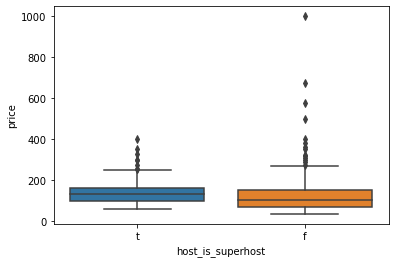

In [5]:
sns.boxplot(data = df, y = "price", x = "host_is_superhost")
plt.show()

#### 2.1.2. Super Host Status and Review Score's Rating

Use a side-by-side boxplots visualization to visualize the relationship between a host's review score rating and their superhost status.

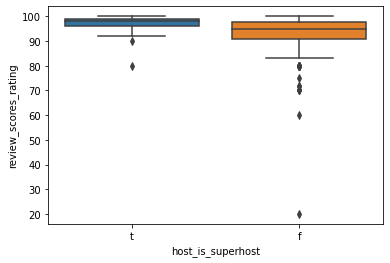

In [6]:
sns.boxplot(data = df, y = "review_scores_rating", x = "host_is_superhost")
plt.show()

#### 2.1.3. Super Host Status and Number of Reviews

Use a side-by-side boxplots visualization to visualize the relationship between the number of reviews for a hosts listing and their superhost status.

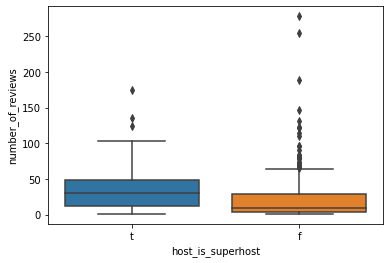

In [7]:
sns.boxplot(data = df, y = "number_of_reviews", x = "host_is_superhost")
plt.show()

### 2.2. Barplots

#### 2.2.1. Super Host Status and Neighborhood

Use a barplot visualization to visualize the relationship between a host's superhost status and the neighborhood that their property is located in.

This plot should display the following percentages:
* the percentage of Belltown property owners that are superhosts
* the percentage of Belltown property owners that are not superhosts
* the percentage of Broadway property owners that are superhosts
* the percentage of Broadway property owners that are not superhosts
* the percentage of Minor property owners that are superhosts
* the percentage of Minor property owners that are not superhosts
* the percentage of Fremont property owners that are superhosts
* the percentage of Fremont property owners that are not superhosts
* the percentage of Wallingford property owners that are superhosts
* the percentage of Wallingford property owners that are not superhosts

Text(0.5, 1.0, 'Neighborhood ratio of superhosts')

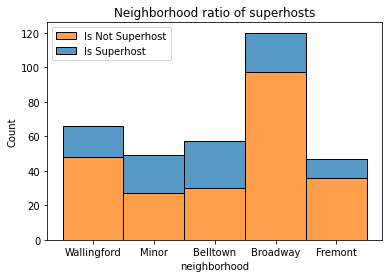

In [12]:
sns.histplot(x = "neighborhood", hue = "host_is_superhost", multiple = "stack", data = df)
plt.legend(["Is Not Superhost", "Is Superhost"])
plt.title("Neighborhood ratio of superhosts")

#### 2.2.2 Interpretation

Is there a relationship between the superhost status of a host and the neighborhood that their property is located in *in this dataset*? Which neighborhood has the highest percentage of their hosts as superhosts?

No relationship and Belltown has the highest percentage of hosts as superhosts

#### 2.2.3. Super Host Status and Property Type

Use a barplot visualization to visualize the relationship between a host's superhost status and the property type

This plot should display the following percentages:
* the percentage of house property owners that are superhosts
* the percentage of house property owners that are not superhosts
* the percentage of apartment property owners that are superhosts
* the percentage of apartment property owners that are not superhosts

Text(0.5, 1.0, 'Property type ratio of superhosts')

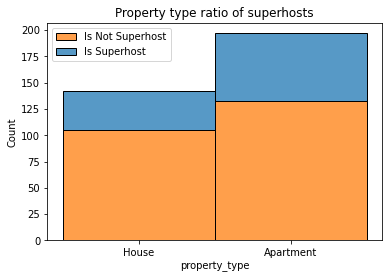

In [13]:
sns.histplot(x = "property_type", hue = "host_is_superhost", multiple = "stack", data = df)
plt.legend(["Is Not Superhost", "Is Superhost"])
plt.title("Property Type ratio of superhosts")

#### 2.2.4 Interpretation

Based on your plots from 2.2.1 and 2.2.3, which variable has a stronger association with superhost status: neighborhood or property type?

Property type

## 3. Fitting and Interpreting Logistic Regression Model

First, we would like to fit a logistic regression model that will predict the probability that a given Airbnb listing host **is a superhost** ie. **(y=1)**, given the following explanatory variables:
* listing price
* review scores rating
* number of reviews
* neighborhod
* property type

### 3.1. Fitting the model

Fit this logistic regression model below and display the summary output table.

In [14]:
df["y"] = df["host_is_superhost"].map({'t': 1, 'f': 0})
df.head()

,price,review_scores_rating,number_of_reviews,security_deposit,cleaning_fee,neighborhood,property_type,room_type,accommodates,bathrooms,beds,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,y
0,300,100,24,500,95,Wallingford,House,Entire home/apt,5,1.5,3,within a few hours,1.0,1,t,t,t,1
1,149,96,11,300,105,Wallingford,Apartment,Entire home/apt,6,1.0,3,within an hour,1.0,1,f,t,t,0
2,95,95,79,150,40,Wallingford,Apartment,Entire home/apt,3,1.0,2,within an hour,1.0,1,f,t,t,0
3,105,100,13,500,50,Wallingford,House,Private room,2,2.0,1,within a few hours,1.0,1,t,t,t,1
4,140,99,30,250,65,Wallingford,House,Entire home/apt,2,1.0,1,within an hour,1.0,1,t,t,t,1


In [15]:
mod1 = smf.logit(formula = 'y ~ price + review_scores_rating + number_of_reviews + neighborhood + property_type' ,data = df).fit()
mod1.summary()

Optimization terminated successfully.
         Current function value: 0.490114
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  339
Model:                          Logit   Df Residuals:                      330
Method:                           MLE   Df Model:                            8
Date:                Tue, 29 Nov 2022   Pseudo R-squ.:                  0.1954
Time:                        22:30:04   Log-Likelihood:                -166.15
converged:                       True   LL-Null:                       -206.49
Covariance Type:            nonrobust   LLR p-value:                 3.574e-14
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     -27.8074      5.148     -5.402      0.000     -37.896     -17.718
neighborhood[T.Broadway]       -1.1046      0.393     -2.813      0.005      -1.874      -0.335
neighborhood[T.Fremont]        -0.7215      0.492     -1.467      0.142      -1.685       0.242
neighborhood[T.Minor]           0.0272      0.490      0.056      0.956      -0.933       0.987
neighborhood[T.Wallingford]    -0.4037      0.472     -0.855      0.392      -1.329       0.521
property_type[T.House]         -0.3405      0.338     -1.009      0.313      -1.002       0.321
price                           0.0013      0.001      0.924      0.356      -0.001       0.004
review_scores_rating            0.2792      0.052      5.333      0.000       0.177       0.382
number_of_reviews               0.0182      0.004      4.470      0.000       0.010       0.026
===============================================================================================
"""

### 3.2. Logistic Regression Model Output

Write out the logistic regression model equation. Make sure to use the correct notation.

-27.804 + 0.0013(price) + 0.2792(review_scores_rating) + 0.0182(number_of_reviews) -1.1046(neighborhood[T.Broadway]) - 0.7215(neighborhood[T.Fremont]) + 0.0272(neighborhood[T.Minor]) - 0.4037(neighborhood[T.Wallingford]) - 0.3405(property_type[T.House])

### 3.3. Intercept Interpretation

If $\hat{\beta}_0$ is your intercept, calculate $e^{\hat{\beta}_0}$ and put it into words. **Make sure to not use causal language!**

In [17]:
np.exp(-27.8074)

8.383003045266744e-13

### 3.4. Numerical Explanatory Variable Slope Interpretation

If $\hat{\beta}_i$ is your slope that corresponds to listing price, calculate $e^{\hat{\beta}_i}$ and put it into words. **Make sure to not use causal language!**

### 3.5. Indicator Variable Slope Interpretation

If $\hat{\beta}_j$ is your slope that corresponds to the property_type[HOUSE] indicator variable, then calculate $e^{\hat{\beta}_j}$ and put it into words. **Make sure to not use causal language!**

### 3.6. More Interpretation

Suppose that our model has predicted that the odds that a host with a 100 dollar listing was a super host is 0.20 (numerical odds format). Suppose this Airbnb host decided to raise their listing price to 101 dollars. What would our model predict the new odds to be that they were a super host? 

## 4.Conducting Inference on the Slopes of the Logistic Regression Model

We would like to conduct inference on the **number of reviews slope** in the population logistic regression model that corresponds to our model.  We would also like to conduct inference on the **odds multiplier for number of reviews** in the population logistic regression model that corresponds to our model.



### 4.1. Conditions for Inference

Check the conditions for conducting inference on your logistic regression population slopes below.

### 4.2. 99% Confidence Intervals

#### 4.2.1. Confidence Interval for Slope

First, create a 99% confidence interval for the **number_of_reviews** slope (ie. a $\beta_i$) in the population logistic regression model that corresponds to our model.

#### 4.2.2. Slope Confidence Interval in Words

Put this confidence interval from 4.2.1 into words.

#### 4.2.3. Confidence Interval for the Odds Multiplier

Then, create a 99% confidence interval for the **odds multiplier for number_of_reviews** in the population logistic regression model that corresponds to our model.

#### 4.2.4. Odds Multiplier Confidence Interval in Words

Put this confidence interval from 4.2.3 into words.

### 4.3. Hypothesis Testing for the Population Slope

Next, we would like to determine if there is sufficient evidence to suggest that there is an association between superhost status and the number of reviews that the host's listing has for the hosts of ALL Seattle Airbnb listings from the top 5 neighborhoods.

To help us test this association, first we would like to test if we have enough evidence to suggest the slope for number_of_reviews is non-zero in the population model.

#### 4.3.1. Hypotheses

Set up the hypotheses for this test below. Make sure you define any parameters that you use.

#### 4.3.2. Test Statistic

Use the summary output table to calculate the test statistic for this test **by hand**. You can use the summary output table to check your work, but it may be a bit different due to rounding errors.

#### 4.3.3. p-value

Use your test statistic that you calculated in 4.3.2. to calculate the p-value for this test **by hand**. You can use scipy.stats functions to help you. Again, you can use the summary output table to check your work, but it may be a bit different due to rounding errors.

#### 4.3.4. Conclusions with a p-value

Use your p-value and a significance level of $\alpha=0.01$ to make a conclusion about your hypotheses in 4.3.1.

#### 4.3.5. Conclusions with a confidence interval

Use the appropriate 99% confidence interval to make a conclusion about your hypotheses in 4.3.1.

### 4.4. Hypothesis Testing for the Population Odds Multiplier

Alternatively, we can use the population odds multiplier for the number of reviews in the corresponding population model to help us test for an association between superhost status and the number of reviews that they have for the hosts of ALL Seattle Airbnb listings from the top 5 neighborhoods.

Specifically, we will test if we have enough evidence to suggest that the odds multiplier for number of reviews is not equal to 1 in the corresponding population model.

#### 4.4.1. Hypotheses

Set up the hypotheses for this test below. Make sure you define any parameters that you use.

#### 4.4.2. Conclusion with a p-value

Use a p-value and a significance level of $\alpha=0.01$ to make a conclusion about your hypotheses in 4.4.1.

#### 4.4.3. Conclusion with a confidence interval

Use the appropriate 99% confidence interval to make a conclusion about your hypotheses in 4.4.1.


### 4.5. Summarization

Based on your conclusions in 4.3.4, 4.3.5, 4.4.2, and 4.4.3, do we have sufficient evidence to suggest that there is an association between superhost status and the number of reviews that the host's listing has for ALL Seattle Airbnb listings from the top 5 neighborhoods?  

## 5. Model Prediction

### 5.1. Log odds prediction

Use your model to predict the **log odds** that an Airbnb host of a \$200/night house in the Belltown neighborhood with 20 reviews and a review scores rating of 95 is **a super host**.

### 5.2. Odds prediction

Use your model to predict the **odds** that an Airbnb host of a \$200/night house in the Belltown neighborhood with 20 reviews and a review scores rating of 95 is **a super host**.

Put your odds into words.
* ie. "The odds of ```<INSERT HERE>``` are ```NUMBER``` to ```NUMBER```
* your "NUMBERS" should be integers

### 5.3. Probability Prediction

Use your model to predict the **probability** that an Airbnb host of a \$200/night house in the Belltown neighborhood with 20 reviews and a review scores rating of 95 is **a super host**.

## 6. Interaction

### 6.1. Number of Reviews vs. Superhost Status by Property Type
Plot a scatterplot with your 0/1 super host status response variable and the number_of_reviews variable. Color code your points by the property type. Finally, fit a logistic regression curve to each set of these points (ie. a logistic regression curve for apartments and a logistic regression curve for houses). 

### 6.2. Interaction Effect

Do you think that there is an interaction between property type and number of reviews when predicting the superhost status of an airbnb host in this data? Why or why not?

### 6.3. New Logistic Regression Model with Interaction Term

Fit a new a logistic regression model that will predict the probability that a given Airbnb listing host **is a superhost** ie. **(y=1)**, given the following explanatory variables:
* listing price
* review scores rating
* number of reviews
* neighborhod
* property type
* interaction between property type and number of reviews

### 6.4. Fit the Model

Write out your new logistic regression model equation below.

### 6.5. Interaction Effect in the Population Model

Do we have sufficient evidence to suggest that there is an interaction effect between property type and number of reviews in the corresponding population model? Use a significance level of $\alpha=0.01$ to explain your answer.